<a href="https://colab.research.google.com/github/shreejitp/Moving-Beyond-Linearity/blob/master/Moving_Beyond_Linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression, Polynomial Regression and Regression Splines

In [0]:
import pandas as pd 

Reference: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Wage.csv to Wage.csv


In [0]:
# Importing Data using Google Colab
import io
df = pd.read_csv(io.BytesIO(uploaded['Wage.csv']))

In [0]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
#data = pd.read_csv("Wage.csv") 
data=df
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


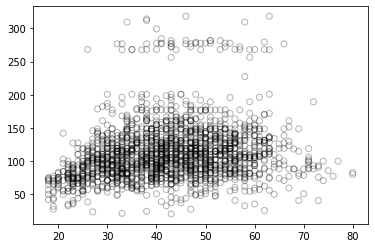

In [0]:
data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

Linear Regression

In [0]:
#from sklearn.linear_model import LinearRegression
#y=train_x.values.reshape(-1,1)
#x = train_x.reshape(-1,1)
#y

array([[49],
       [40],
       [55],
       ...,
       [61],
       [34],
       [29]])

In [0]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

[0.72190831]
80.65287740759283


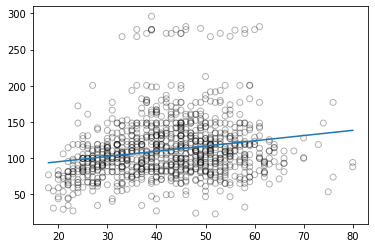

In [0]:
# Prediction on validation dataset
valid_x = valid_x.values.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [0]:
#RMSE on the predictions
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)


40.436687488017256


# Improvement over Linear Regression: Polynomial Regression

[ -0.05194765   5.22868974 -10.03406116]


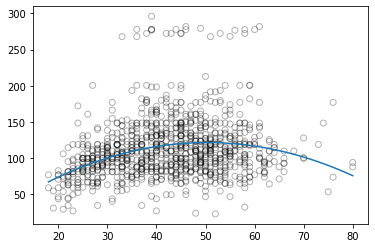

In [0]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

[ 6.29073869e-04 -1.36805158e-01  8.82469303e+00 -5.74157278e+01]


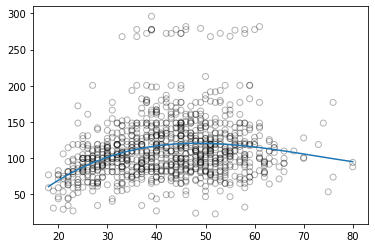

In [0]:
# Generating weights for polynomial function with degree =3
weights = np.polyfit(train_x, train_y, 3)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(valid_x)
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred_plot = model(xp)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

## Walk-through of Regression Splines along with its Implementations

In order to overcome the disadvantages of polynomial regression, we can use an improved regression technique which, instead of building one model for the entire dataset, divides the dataset into multiple bins and fits each bin with a separate model. Such a technique is known as Regression spline

Regression splines is one of the most important non linear regression techniques. In polynomial regression, we generated new features by using various polynomial functions on the existing features which imposed a global structure on the dataset. To overcome this, we can divide the distribution of the data into separate portions and fit linear or low degree polynomial functions on each of these portions.

In [0]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [0]:
df_cut

1382      (33.5, 49.0]
23        (33.5, 49.0]
2140      (49.0, 64.5]
1117    (17.938, 33.5]
933       (33.5, 49.0]
             ...      
2763      (33.5, 49.0]
905       (33.5, 49.0]
1096      (49.0, 64.5]
235       (33.5, 49.0]
1061    (17.938, 33.5]
Name: age, Length: 2010, dtype: category
Categories (4, interval[float64]): [(17.938, 33.5] < (33.5, 49.0] < (49.0, 64.5] < (64.5, 80.0]]

In [0]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

In [0]:
df_steps

,age,age_cuts,wage
1382,49,"(33.5, 49.0]",117.146817
23,40,"(33.5, 49.0]",160.642475
2140,55,"(49.0, 64.5]",81.283253
1117,32,"(17.938, 33.5]",94.072715
933,42,"(33.5, 49.0]",75.043154
...,...,...,...
2763,44,"(33.5, 49.0]",73.775743
905,49,"(33.5, 49.0]",104.921506
1096,61,"(49.0, 64.5]",148.413159
235,34,"(33.5, 49.0]",81.283253


In [0]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [0]:
#Renaming the Columns in the step above 
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 

In [0]:
df_steps_dummies

,17.938-33.5,33.5-49,49-64.5,64.5-80
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0
...,...,...,...,...
2763,0,1,0,0
905,0,1,0,0
1096,0,0,1,0
235,0,1,0,0


The generalized linear models (GLMs) are a broad class of models that include linear regression, ANOVA, Poisson regression, log-linear models etc. The table below provides a good summary of GLMs following Agresti (ch. 4, 2013)
#https://newonlinecourses.science.psu.edu/stat504/node/216/

In [0]:
# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

In [0]:
# Binning validation set into same 4 bins
bin_mapping = bin_mapping.ravel()
#bin_mapping


In [0]:
X_valid = pd.get_dummies(bin_mapping)

In [0]:
# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid_y, pred2)) 
print(rms) 


# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)

39.990600783110395


In [0]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

# Cubic and Natural Cubic Splines

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative). In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives)

In [0]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

In [0]:
#transformed_x

39.40318768341125
39.34292609147627


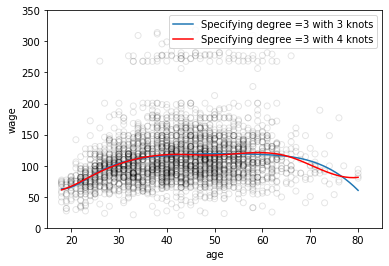

In [0]:

# Fitting Generalised linear model on transformed dataset 1
fit1 = sm.GLM(train_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset 2 
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(valid_y, pred1))
print(rms1)

rms2 = sqrt(mean_squared_error(valid_y, pred2))
print(rms2)


# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

We know that the behavior of polynomials that are fit to the data tends to be erratic near the boundaries. Such variability can be dangerous. These problems are resembled by splines, too. The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline.
A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. This constrains the cubic and quadratic parts there to 0, each reducing the degrees of freedom by 2. That’s 2 degrees of freedom at each of the two ends of the curve, reducing K+4 to K.





39.44823813743623


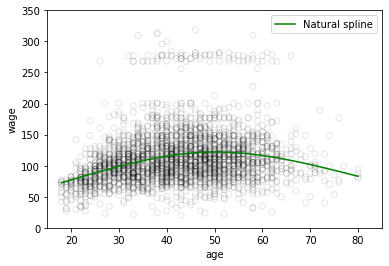

In [0]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))
# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)


# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

## Choosing the Number and Locations of the Knots

When we fit a spline, where should we place the knots? One potential place would be the area of high variability, because in those regions the polynomial coefficients can change rapidly. Hence, one option is to place more knots in places where we feel the function might vary most rapidly, and to place fewer knots where it seems more stable.

While this option can work well, in practice it is common to place knots in a uniform fashion. One way to do this is to specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.

Another option is to try out different numbers of knots and see which produces the best looking curve.

A more objective approach is to use cross-validation. With this method:

  1) we remove a portion of the data,
  2) fit a spline with a certain number of knots to the remaining data, and  then,
  3) use the spline to make predictions for the held-out portion.

We repeat this process multiple times until each observation has been left out once, and then compute the overall cross-validated RMSE. This procedure can be repeated for different numbers of K knots. Then the value of K giving the smallest RMSE is chosen.



# Comparison of Regression Splines with Polynomial Regression

Regression splines often give better results than polynomial regression. This is because, unlike polynomials, which must use a high degree polynomial to produce flexible fits, splines introduce flexibility by increasing the number of knots but keep the degree fixed.

Generally, this approach produces more stable estimates. Splines also allow us to place more knots, and hence flexibility, over regions where the function seems to be changing rapidly, and fewer knots where the function appears more stable. The extra flexibility in the polynomial produces undesirable results at the boundaries, whereas the natural cubic spline still provides a reasonable fit to the data.

# In this article, we learned about regression splines and their benefits over linear and polynomial regression. Another method to produce splines is called smoothing splines. It works similar to Ridge/Lasso regularisation as it penalizes both loss function and a smoothing function. You can read more about it in the book ‘Introduction to Statistical learning’. You can implement these methods on datasets with high variability and notice the difference